In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv("BHP.csv")
data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [2]:
data.isnull().sum()



area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [3]:
df1 = data
df1['balcony'] = data['balcony'].fillna(0)
df1 = df1.drop(['area_type','availability','society'],axis = 'columns')
df2 = df1.dropna(axis = 0)
df2.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
balcony       0
price         0
dtype: int64

In [4]:
df2['bhk'] = df2['size'].apply(lambda x: int(str(x).split(' ')[0]))
df2.drop(['size'],axis = 'columns')

C:\Users\anees\AppData\Local\Temp\ipykernel_9532\2310151399.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['bhk'] = df2['size'].apply(lambda x: int(str(x).split(' ')[0]))


,location,total_sqft,bath,balcony,price,bhk
0,Electronic City Phase II,1056,2.0,1.0,39.07,2
1,Chikka Tirupathi,2600,5.0,3.0,120.00,4
2,Uttarahalli,1440,2.0,3.0,62.00,3
3,Lingadheeranahalli,1521,3.0,1.0,95.00,3
4,Kothanur,1200,2.0,1.0,51.00,2
...,...,...,...,...,...,...
13315,Whitefield,3453,4.0,0.0,231.00,5
13316,Richards Town,3600,5.0,0.0,400.00,4
13317,Raja Rajeshwari Nagar,1141,2.0,1.0,60.00,2
13318,Padmanabhanagar,4689,4.0,1.0,488.00,4


In [5]:
df2['bath'] = df2['bath'].apply(lambda x: int(x))
df2['balcony'] = df2['balcony'].apply(lambda x: int(x))
df2.drop(['size'],axis = 'columns',inplace=True)
df2

C:\Users\anees\AppData\Local\Temp\ipykernel_9532\1292335145.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['bath'] = df2['bath'].apply(lambda x: int(x))
C:\Users\anees\AppData\Local\Temp\ipykernel_9532\1292335145.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['balcony'] = df2['balcony'].apply(lambda x: int(x))
C:\Users\anees\AppData\Local\Temp\ipykernel_9532\1292335145.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the d

,location,total_sqft,bath,balcony,price,bhk
0,Electronic City Phase II,1056,2,1,39.07,2
1,Chikka Tirupathi,2600,5,3,120.00,4
2,Uttarahalli,1440,2,3,62.00,3
3,Lingadheeranahalli,1521,3,1,95.00,3
4,Kothanur,1200,2,1,51.00,2
...,...,...,...,...,...,...
13315,Whitefield,3453,4,0,231.00,5
13316,Richards Town,3600,5,0,400.00,4
13317,Raja Rajeshwari Nagar,1141,2,1,60.00,2
13318,Padmanabhanagar,4689,4,1,488.00,4


In [6]:
def is_float(x):
    try:
        float (x)
    except:
        return False
    return True

In [7]:
df3 = df2[~df2['total_sqft'].apply(is_float)].head(10)

In [8]:
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float (tokens [1]))/2
    try:
        return float (x)
    except:
        return None

In [9]:
df4 = df2.copy()
df4['total_sqft'] = df4['total_sqft'].apply(convert_sqft_to_num)
df4

,location,total_sqft,bath,balcony,price,bhk
0,Electronic City Phase II,1056.0,2,1,39.07,2
1,Chikka Tirupathi,2600.0,5,3,120.00,4
2,Uttarahalli,1440.0,2,3,62.00,3
3,Lingadheeranahalli,1521.0,3,1,95.00,3
4,Kothanur,1200.0,2,1,51.00,2
...,...,...,...,...,...,...
13315,Whitefield,3453.0,4,0,231.00,5
13316,Richards Town,3600.0,5,0,400.00,4
13317,Raja Rajeshwari Nagar,1141.0,2,1,60.00,2
13318,Padmanabhanagar,4689.0,4,1,488.00,4


In [10]:
df4['price_per_sqft']= df4['price']*100000/df4['total_sqft']
df4

,location,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2,1,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5,3,120.00,4,4615.384615
2,Uttarahalli,1440.0,2,3,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3,1,95.00,3,6245.890861
4,Kothanur,1200.0,2,1,51.00,2,4250.000000
...,...,...,...,...,...,...,...
13315,Whitefield,3453.0,4,0,231.00,5,6689.834926
13316,Richards Town,3600.0,5,0,400.00,4,11111.111111
13317,Raja Rajeshwari Nagar,1141.0,2,1,60.00,2,5258.545136
13318,Padmanabhanagar,4689.0,4,1,488.00,4,10407.336319


In [11]:
df4['location'] = df4['location'].apply(lambda x: x.strip())
location_stats = df4.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats

location
Whitefield               535
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           266
Thanisandra              236
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Karnataka Shabarimala      1
whitefiled                 1
Name: location, Length: 1293, dtype: int64

In [12]:
df4['location'] = df4['location'].apply(lambda x: 'other' if x in location_stats[location_stats<10] else x)
len(df4['location'].unique())
df4

,location,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2,1,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5,3,120.00,4,4615.384615
2,Uttarahalli,1440.0,2,3,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3,1,95.00,3,6245.890861
4,Kothanur,1200.0,2,1,51.00,2,4250.000000
...,...,...,...,...,...,...,...
13315,Whitefield,3453.0,4,0,231.00,5,6689.834926
13316,other,3600.0,5,0,400.00,4,11111.111111
13317,Raja Rajeshwari Nagar,1141.0,2,1,60.00,2,5258.545136
13318,Padmanabhanagar,4689.0,4,1,488.00,4,10407.336319


In [13]:
df5 = df4[~(df4['total_sqft']/df4['bhk']<300)]
df5.shape

(12502, 7)

In [14]:
df5['price_per_sqft'].describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [15]:
def remove_pps_outliers(df):
    df_out = pd. DataFrame ()
    for key, subdf in df.groupby( 'location' ):
        m = np.mean (subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[ (subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st) )]
        df_out = pd. concat ([df_out, reduced_df], ignore_index=True)
    return df_out

df6 = remove_pps_outliers(df5)
df6

,location,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,1st Block Jayanagar,2850.0,4,1,428.00,4,15017.543860
1,1st Block Jayanagar,1630.0,3,2,194.00,3,11901.840491
2,1st Block Jayanagar,1875.0,2,3,235.00,3,12533.333333
3,1st Block Jayanagar,1200.0,2,0,130.00,3,10833.333333
4,1st Block Jayanagar,1235.0,2,2,148.00,2,11983.805668
...,...,...,...,...,...,...,...
10217,other,1353.0,2,2,110.00,2,8130.081301
10218,other,812.0,1,0,26.00,1,3201.970443
10219,other,1440.0,2,2,63.93,3,4439.583333
10220,other,1075.0,2,2,48.00,2,4465.116279


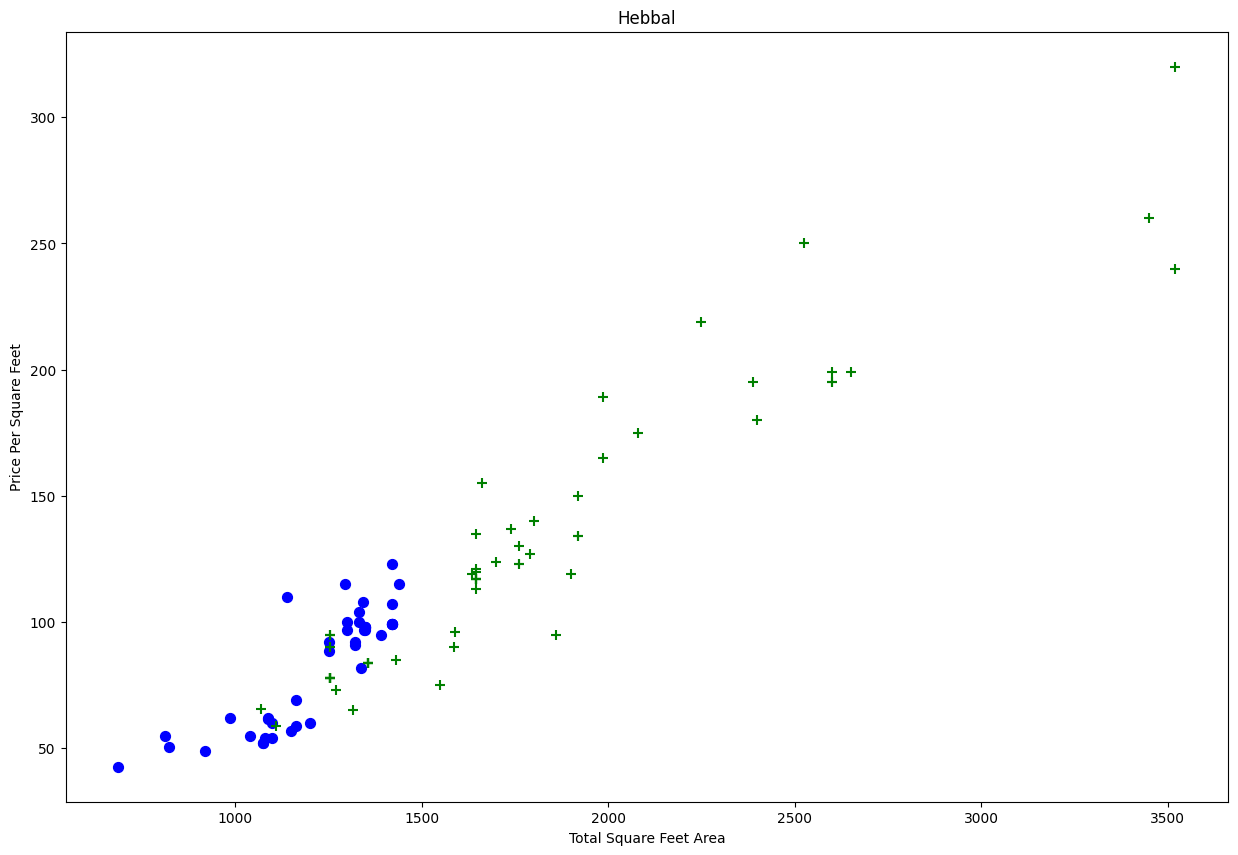

In [16]:

def plot_scatter_chart(df,location):
    bhk2 = df[ (df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    plt.rcParams ['figure.figsize'] = (15,10)
    plt. scatter(bhk2. total_sqft,bhk2. price, color='blue', label='2 BHK', s=50)
    plt. scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green' ,label='3 BHK', s=50)
    plt. xlabel("Total Square Feet Area")
    plt. ylabel("Price Per Square Feet")
    plt. title(location)
    plt. legend
    
plot_scatter_chart(df6,'Hebbal')

In [17]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby( 'location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats [bhk] = {
                'mean' : np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby ('bhk'):
            stats = bhk_stats.get (bhk-1)
            if stats and stats ['count']>5:
                exclude_indices = np.append (exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')

df7 = remove_bhk_outliers(df6)
df7.shape

(7369, 7)

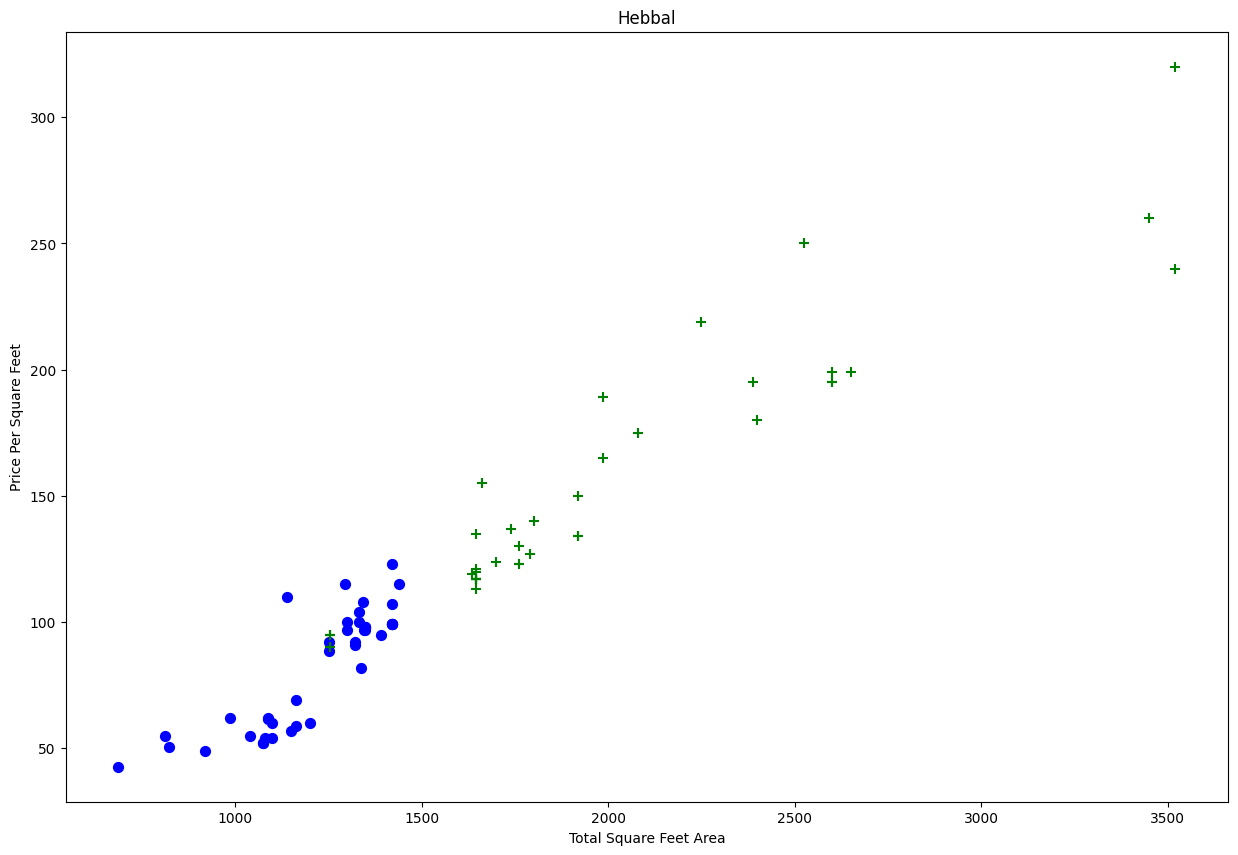

In [18]:
plot_scatter_chart(df7,'Hebbal')

Text(0, 0.5, 'Count')

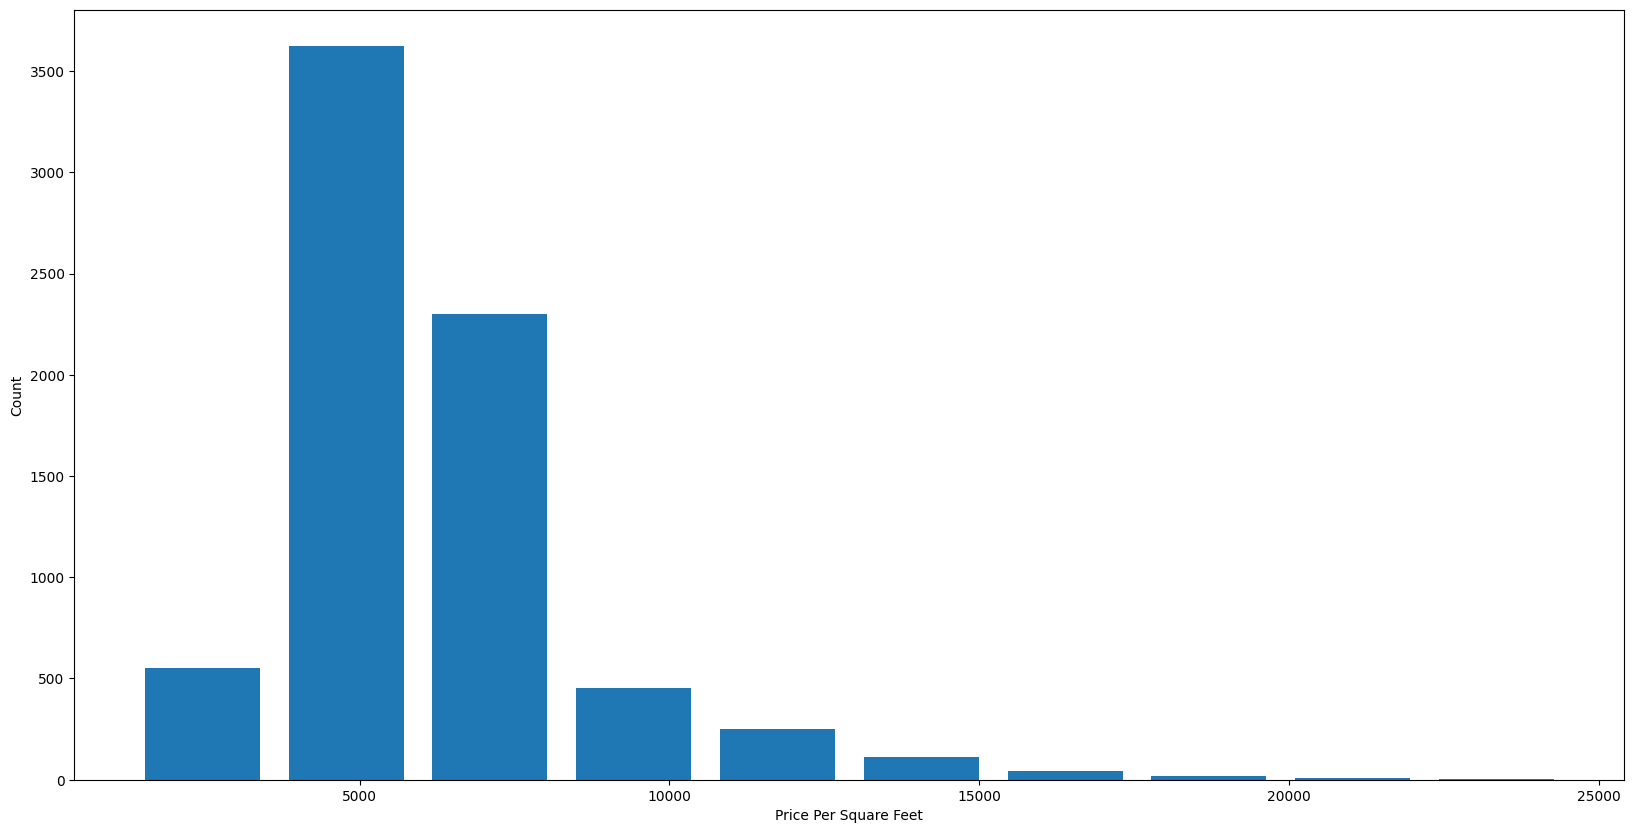

In [19]:
import matplotlib
matplotlib. rcParams ["figure.figsize"] = (20,10)
plt.hist(df7.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet") 
plt.ylabel("Count")

Text(0, 0.5, 'count')

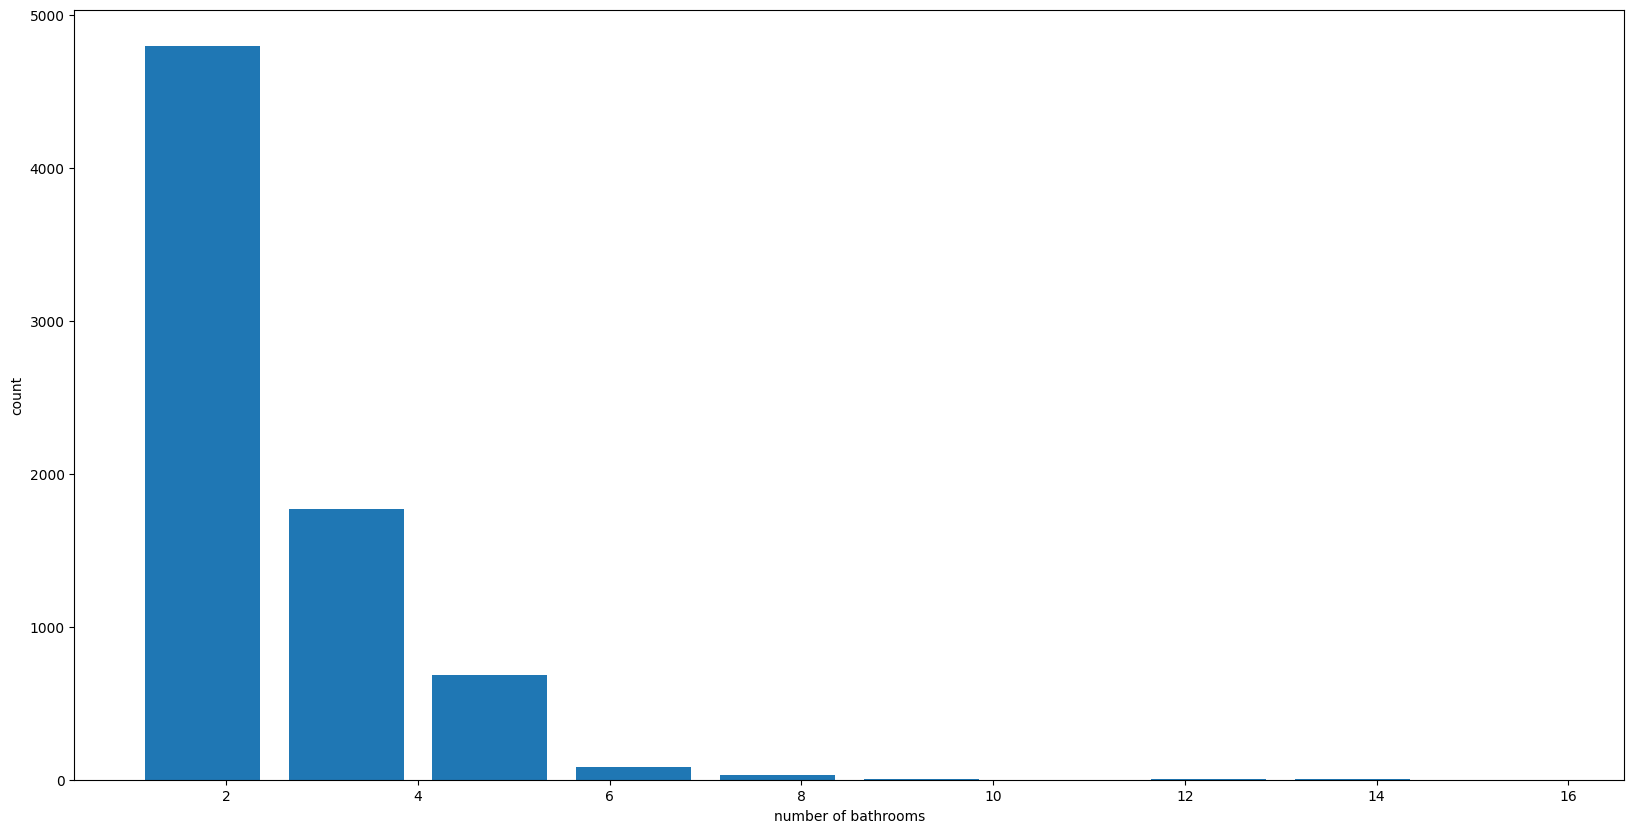

In [20]:
plt.hist(df7.bath, rwidth=0.8)
plt.xlabel('number of bathrooms')
plt.ylabel('count')

In [21]:
df8= df7[df7['bath']<df7['bhk']+2]
df8

,location,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,1st Block Jayanagar,2850.0,4,1,428.0,4,15017.543860
1,1st Block Jayanagar,1630.0,3,2,194.0,3,11901.840491
2,1st Block Jayanagar,1875.0,2,3,235.0,3,12533.333333
3,1st Block Jayanagar,1200.0,2,0,130.0,3,10833.333333
4,1st Block Jayanagar,1235.0,2,2,148.0,2,11983.805668
...,...,...,...,...,...,...,...
10213,other,1200.0,2,3,70.0,2,5833.333333
10214,other,1800.0,1,1,200.0,1,11111.111111
10217,other,1353.0,2,2,110.0,2,8130.081301
10218,other,812.0,1,0,26.0,1,3201.970443


In [22]:
df9 = df8.drop(['price_per_sqft'],axis='columns')
df9

,location,total_sqft,bath,balcony,price,bhk
0,1st Block Jayanagar,2850.0,4,1,428.0,4
1,1st Block Jayanagar,1630.0,3,2,194.0,3
2,1st Block Jayanagar,1875.0,2,3,235.0,3
3,1st Block Jayanagar,1200.0,2,0,130.0,3
4,1st Block Jayanagar,1235.0,2,2,148.0,2
...,...,...,...,...,...,...
10213,other,1200.0,2,3,70.0,2
10214,other,1800.0,1,1,200.0,1
10217,other,1353.0,2,2,110.0,2
10218,other,812.0,1,0,26.0,1


In [23]:
dummies = pd.get_dummies(df9.location)
dummies.head(10)

,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [24]:
df10 = pd.concat([df9,dummies.drop('other',axis='columns')],axis='columns')
df10

,location,total_sqft,bath,balcony,price,bhk,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase Judicial Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4,1,428.0,4,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1st Block Jayanagar,1630.0,3,2,194.0,3,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1st Block Jayanagar,1875.0,2,3,235.0,3,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1st Block Jayanagar,1200.0,2,0,130.0,3,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1st Block Jayanagar,1235.0,2,2,148.0,2,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10213,other,1200.0,2,3,70.0,2,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10214,other,1800.0,1,1,200.0,1,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10217,other,1353.0,2,2,110.0,2,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10218,other,812.0,1,0,26.0,1,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [25]:
df10 = df10.drop(['location'],axis = 'columns')
df10

,total_sqft,bath,balcony,price,bhk,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4,1,428.0,4,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1630.0,3,2,194.0,3,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1875.0,2,3,235.0,3,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1200.0,2,0,130.0,3,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1235.0,2,2,148.0,2,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10213,1200.0,2,3,70.0,2,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10214,1800.0,1,1,200.0,1,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10217,1353.0,2,2,110.0,2,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10218,812.0,1,0,26.0,1,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [26]:
X = df10.drop(['price'],axis = 'columns')
y = df10.price
y
X

,total_sqft,bath,balcony,bhk,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4,1,4,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1630.0,3,2,3,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1875.0,2,3,3,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1200.0,2,0,3,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1235.0,2,2,2,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10213,1200.0,2,3,2,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10214,1800.0,1,1,1,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10217,1353.0,2,2,2,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10218,812.0,1,0,1,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [27]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=10)

In [28]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.8553205216681912

In [29]:
from sklearn.model_selection import ShuffleSplit
from sklearn. model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.84171941, 0.82928531, 0.9016363 , 0.85101848, 0.84268207])

In [30]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_Regression' : {
            'model':LinearRegression(),
            'params':{
                'fit_intercept': [True, False],
                'copy_X': [True, False]
            }
        },
        
        'Lasso':{
            'model':Lasso(),
            'params':{
                'alpha':[1,2],
                'selection': ['random','cyclic']
            }
        },
        
        'decision_tree':{
            'model':DecisionTreeRegressor(),
            'params':{
                'criterion':['friedman_mse','squared_error'],
                'splitter':['best','random']
            }
        }
    }
    
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs = GridSearchCV(config[ 'model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores. append ({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs. best_params_
        })
    
    return pd.DataFrame(scores, columns=[ 'model', 'best_score', 'best_params '])

find_best_model_using_gridsearchcv(X,y)

,model,best_score,best_params
0,linear_Regression,0.853746,NaN
1,Lasso,0.702866,NaN
2,decision_tree,0.709901,NaN


In [31]:
def predict_price(location, sqft,bath, balcony, bhk) :
    loc_index = np.where(X.columns==location)[0][0]
    x = np.zeros(len(X.columns) )
    x[0] = sqft
    x[1] = bath
    x[2] = balcony
    x[3] = bhk
    if loc_index >= 0:
        x[loc_index] = 1
        
    return lr_clf.predict([x])[0]

In [32]:
predict_price('1st Phase JP Nagar',1500,3,2,3)

c:\Users\anees\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


127.77298455064053

In [33]:
predict_price('Indira Nagar',4000,3,5,3)

c:\Users\anees\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


416.13551597527464

In [34]:
import pickle
with open('banglore_home_prices_model.pickie','wb') as f:
    pickle.dump (lr_clf,f)

In [35]:
import json
columns = {
    'data_columns' : [col. lower() for col in X.columns]
}
with open("columns.json", "w") as f:
    f.write (json.dumps (columns) )